In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps
import os

In [4]:
os.getcwd()
os.chdir("Student_Scores")

In [7]:
df =pd.read_csv("Student_Scores.csv")

In [10]:
df.isna().values.any()

np.True_

In [11]:
df.duplicated().values.any()

np.False_

In [12]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [14]:
df.isna().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

## Drop Unnamed Column

In [19]:
df.drop("Unnamed: 0", axis=1, inplace=True)

## Gender Distriburtion

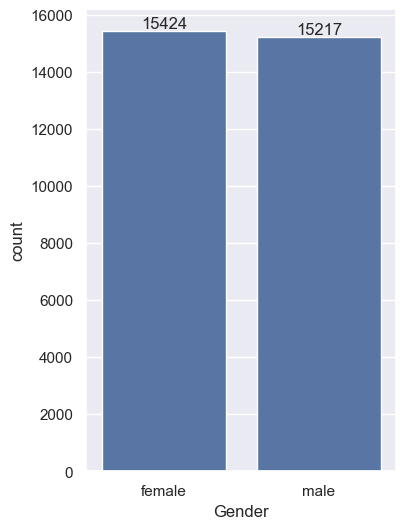

In [28]:
sns.set(rc={"figure.figsize":(4,6)})
ax = sns.countplot(df, x="Gender")
for bars in ax.containers:
    ax.bar_label(bars)

* Conculsion - Number of females is more in the dataset then number of males in the data

In [41]:
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

Text(0.5, 1.0, 'Relationship Between Parents Educations and Student Scores')

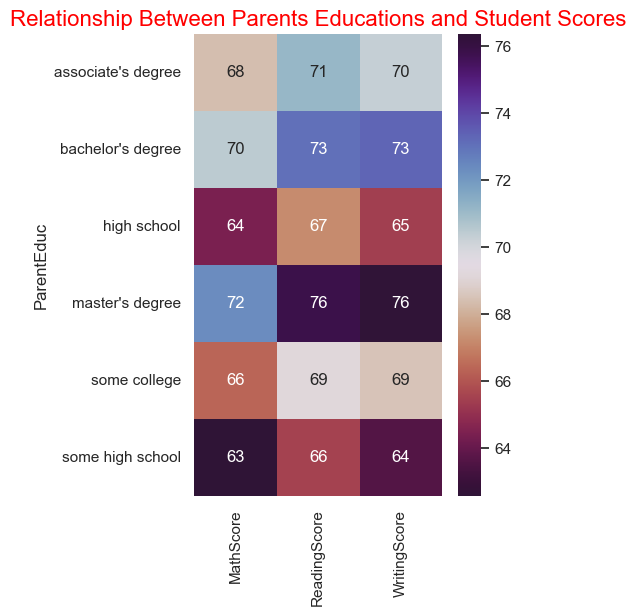

In [50]:
gb= df.groupby("ParentEduc").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
gb
sns.heatmap(gb, annot=True, cmap= 'twilight_shifted_r')
plt.title("Relationship Between Parents Educations and Student Scores", color="red", fontsize=16)

* Conculsion - From the above chart we have conculded that Education of Parents have a impact on students score

Text(0.5, 1.0, 'Relationship Between Parents Marital Status and Student Scores')

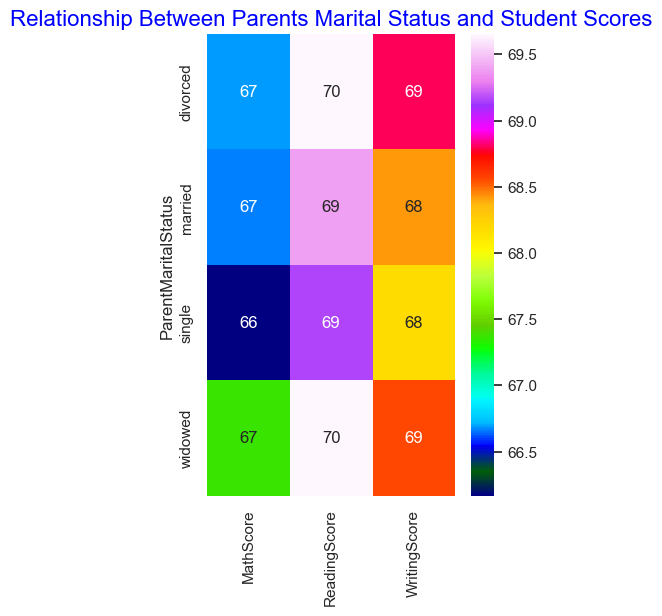

In [52]:
gb_marital = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
gb_marital
sns.heatmap(gb_marital, annot=True, cmap='gist_ncar')
plt.title("Relationship Between Parents Marital Status and Student Scores", color="blue", fontsize=16)

* Conculsion - From the above chart we have conculded that there is no.neligible impact on student scores due to Parent
 Marital Status.

In [55]:
df["EthnicGroup"].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [60]:
groupA=df[df["EthnicGroup"]=="group A"].count()
groupB=df[df["EthnicGroup"]=="group B"].count()
groupC=df[df["EthnicGroup"]=="group C"].count()
groupD=df[df["EthnicGroup"]=="group D"].count()
groupE=df[df["EthnicGroup"]=="group E"].count()

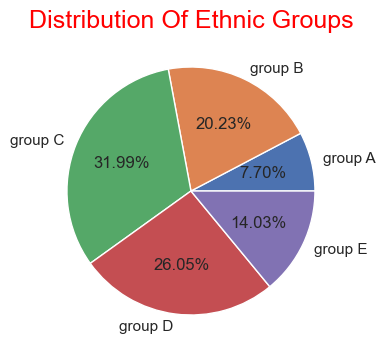

[np.int64(2219), np.int64(5826), np.int64(9212), np.int64(7503), np.int64(4041)]


In [68]:
l=["group A", "group B", "group C", "group D", "group E"]
mlist = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]
plt.pie(mlist, labels=l, autopct="%1.2f%%")
plt.title("Distribution Of Ethnic Groups", c="red", fontsize=18)
plt.show()
print(mlist)

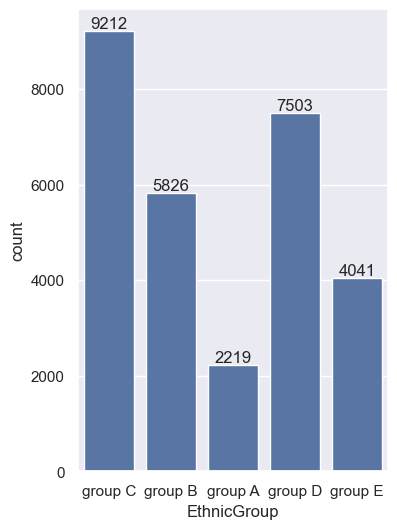

In [72]:
ax =sns.countplot(df,x="EthnicGroup")
for bars in ax.containers:
    ax.bar_label(bars)

In [73]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [74]:
gb_sport = df.groupby("PracticeSport").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
gb_sport

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


Text(0.5, 1.0, 'Relationship Between Practice Sports and Students Scores')

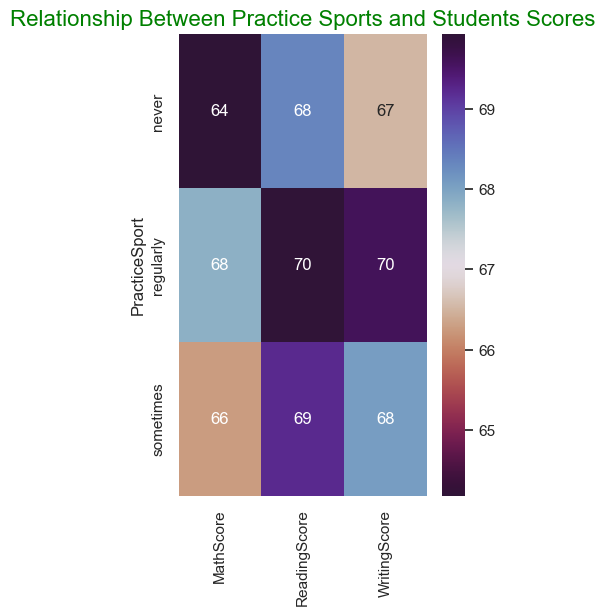

In [76]:
sns.heatmap(gb_sport, annot=True, cmap= 'twilight_shifted_r')
plt.title("Relationship Between Practice Sports and Students Scores", c="green", fontsize=16)

* Conculsion - From the above Chart we can conculde that there is no/neligible impact on students scores due to practice sport